<a href="https://colab.research.google.com/github/Hristo2076/ml_processes/blob/main/emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Цель:** Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

In [ ]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2. Проведите первичный анализ.
  1. Проверьте количество записей для каждого класса. Сделайте вывод.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель дерева решений RandomForestClassifier на обучающем множестве.
5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [ ]:
glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: ylabel='Frequency'>

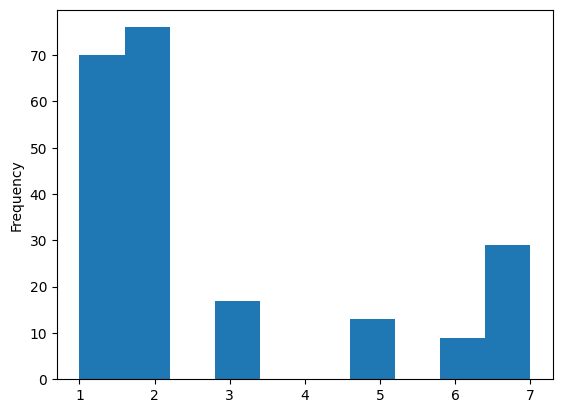

In [ ]:
glass.Type.plot.hist()

Вывод: Пропусков нет, дано всего 6 видов стекла, от 1 до 7 включительно с пропуком вида стекла номер 4, делегирующие классы стекла 1 и 2 

In [ ]:
X = glass.drop('Type',axis=1)
y = glass.Type

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.25,
                                                 random_state = 33)


In [ ]:
rf = RandomForestClassifier(max_depth=6,
                            criterion='log_loss',
                            n_estimators=75,
                            min_samples_split=5,
                            min_samples_leaf=2,
                            max_features='log2'
                            )

rf.fit(X_train,y_train)


RandomForestClassifier(criterion='log_loss', max_depth=6, max_features='log2',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=75)

In [ ]:
y_pred = rf.predict(X_test)
target = ['glass1','glass2','glass3','glass5','glass6','glass7']
print(classification_report(y_test,y_pred,target_names=target))

              precision    recall  f1-score   support

      glass1       0.63      1.00      0.77        12
      glass2       0.93      0.76      0.84        17
      glass3       1.00      0.20      0.33         5
      glass5       0.60      0.60      0.60         5
      glass6       1.00      1.00      1.00         4
      glass7       0.91      0.91      0.91        11

    accuracy                           0.80        54
   macro avg       0.84      0.75      0.74        54
weighted avg       0.84      0.80      0.78        54



###**accuracy = 0.80**

6. Обработайте выбросы в данных.
  1. Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
  2. Исследуйте признаки на выбросы несколькими способами.
  3. Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.
7. Повторите п. 4, п. 5.

<Axes: >

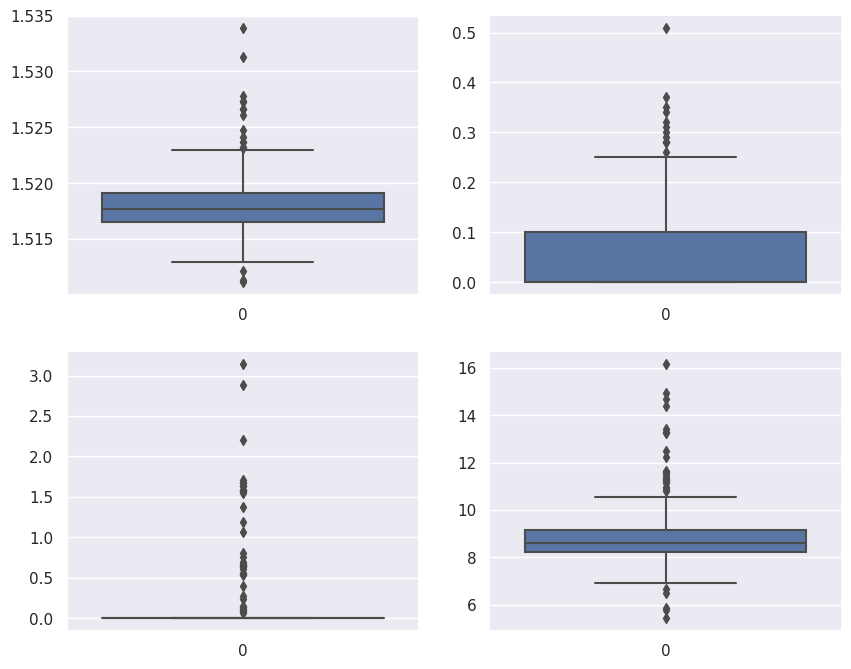

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
fig, axes = plt.subplots(2,2 )


sns.boxplot(glass.RI,ax=axes[0,0])
sns.boxplot(glass.Fe,ax=axes[0,1])
sns.boxplot(glass.Ba,ax=axes[1,0])
sns.boxplot(glass.Ca,ax=axes[1,1])			

<Figure size 800x800 with 0 Axes>

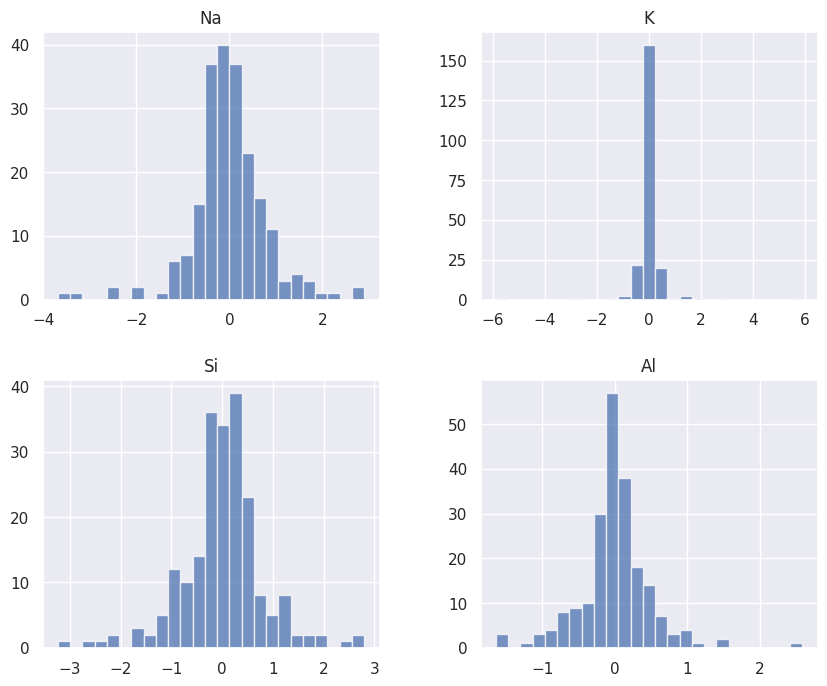

In [ ]:
plt.figure(figsize=(8,8));

glass[['Na','K','Si','Al']].diff().hist(color="b", alpha=0.74, bins=25);

In [ ]:
data_clean = glass[
    (glass['RI'] < 1.523) &
    (glass['RI'] > 1.512) &
    (glass['Na'] < 15.2) &
    (glass['Na'] > 11.6) &
    (glass['Al'] < 2.5) &
    (glass['Al'] > 0.6) &
    (glass['Si'] < 74) &
    (glass['Si'] > 71) &
    (glass['K'] < 1.2) &
    (glass['Ca'] < 11.6) &
    (glass['Ca'] > 7) &
    (glass['Fe'] < 0.25)
]

data_clean.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,1.517834,13.382346,2.997716,1.423457,72.755494,0.448086,8.688025,0.122469,0.044938,2.401235
std,0.001698,0.637023,1.204587,0.340851,0.499045,0.247204,0.733660,0.381883,0.074885,1.859873
min,1.514090,12.160000,0.000000,0.650000,71.350000,0.000000,7.080000,0.000000,0.000000,1.000000
25%,1.516558,12.930000,3.197500,1.212500,72.457500,0.230000,8.220000,0.000000,0.000000,1.000000
50%,1.517555,13.240000,3.520000,1.360000,72.835000,0.560000,8.540000,0.000000,0.000000,2.000000
75%,1.518500,13.647500,3.607500,1.602500,73.097500,0.600000,8.897500,0.000000,0.090000,2.000000
max,1.522270,15.150000,4.490000,2.420000,73.880000,1.100000,11.530000,1.710000,0.240000,7.000000


In [ ]:
round(100 * (glass.groupby('Type').count() - data_clean.groupby('Type').count())/ glass.groupby('Type').count(),1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,12.9,12.9,12.9,12.9,12.9,12.9,12.9,12.9,12.9
2,19.7,19.7,19.7,19.7,19.7,19.7,19.7,19.7,19.7
3,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8,11.8
5,69.2,69.2,69.2,69.2,69.2,69.2,69.2,69.2,69.2
6,33.3,33.3,33.3,33.3,33.3,33.3,33.3,33.3,33.3
7,48.3,48.3,48.3,48.3,48.3,48.3,48.3,48.3,48.3


In [ ]:
data_clean.groupby('Type').count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,61,61,61,61,61,61,61,61,61
2,61,61,61,61,61,61,61,61,61
3,15,15,15,15,15,15,15,15,15
5,4,4,4,4,4,4,4,4,4
6,6,6,6,6,6,6,6,6,6
7,15,15,15,15,15,15,15,15,15


<Figure size 800x800 with 0 Axes>

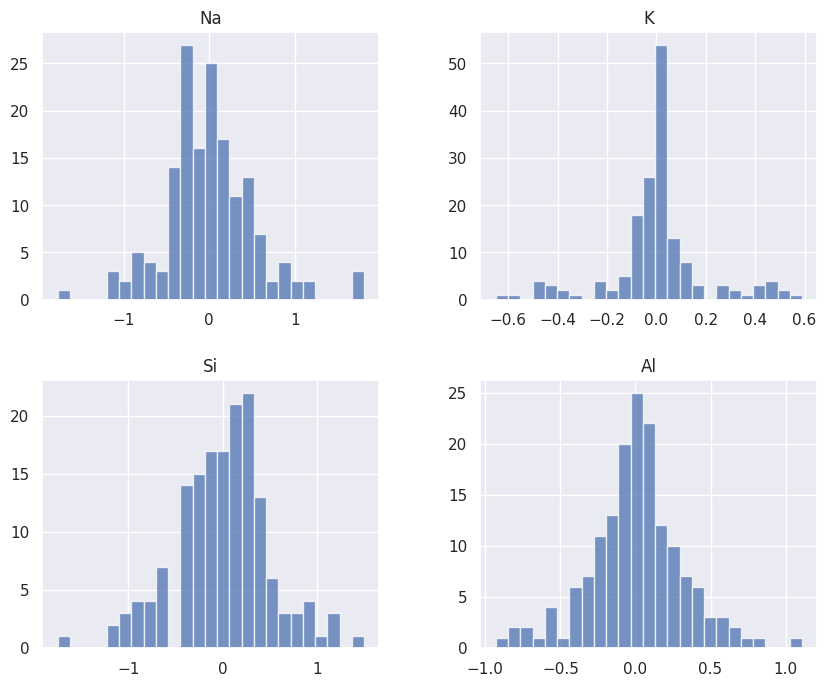

In [ ]:
plt.figure(figsize=(8,8));

data_clean[['Na','K','Si','Al']].diff().hist(color="b", alpha=0.74, bins=25);

In [ ]:
X = data_clean.drop('Type',axis=1)
y = data_clean.Type

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.25,
                                                 random_state = 33)


In [ ]:
rf_2 = RandomForestClassifier(max_depth=6,
                            criterion='log_loss',
                            n_estimators=75,
                            min_samples_split=5,
                            min_samples_leaf=2,
                            max_features='log2'
                            )

rf_2.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=6, max_features='log2',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=75)

In [ ]:
y_pred = rf_2.predict(X_test)
target = ['glass1','glass2','glass3','glass5','glass6','glass7']
print(classification_report(y_test,y_pred,target_names=target))

              precision    recall  f1-score   support

      glass1       0.56      0.82      0.67        11
      glass2       0.77      0.62      0.69        16
      glass3       1.00      0.20      0.33         5
      glass5       0.00      0.00      0.00         0
      glass6       0.50      1.00      0.67         1
      glass7       1.00      1.00      1.00         8

    accuracy                           0.71        41
   macro avg       0.64      0.61      0.56        41
weighted avg       0.78      0.71      0.70        41



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


8. Сформулируйте выводы по проделанной работе.
  1. Кратко опишите, какие преобразования были сделаны с данными.
  2. Сравните точность двух моделей.
  3. Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.

1. Меою был проведен анализ данных с использованием инструментов `seaborn` и `matplotlib` не смотря на размер выборки были совершены срезы по выбросам и модель просела в качестве , склоняюсь к тому что выборка данных и без того мала, а мы ее сократили примерно на четверть.
2. точность первой модели составила 80%, точность модели после удаления выбросов составила 71%
3. Я считаю что иследовать данные необходимо, нужно всегда считаться с размером выборки и обращать внимание на качество данных.На фоне удаления выбросов необходимо также помнить о создании новых параметров за счет имеющихся